In [1]:
R.version.string

[1] "R version 4.2.1 (2022-06-23)"

In [2]:
install.packages('reshape2')
install.packages('pwr')
install.packages('gdata')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gtools’




In [3]:
if(!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("ssize")
BiocManager::install("marray")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.1 (2022-06-23)

Installing package(s) 'BiocVersion', 'ssize'

also installing the dependency ‘xtable’


Old packages: 'commonmark', 'cpp11', 'data.table', 'devtools', 'digest',
  'openssl', 'roxygen2', 'sys', 'tibble', 'tidyselect', 'tidyverse', 'yaml',
  'foreign', 'nlme'

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.1 (2022-06-23)

Installing package(s) 'marray'

also installing the dependency ‘limma’


Old packages: 'commonmark', 'cpp11', 'data.table', 'devtools', 'digest',
  'openssl', 'roxygen2', 'sys', 'tibble', 'tid

In [8]:
library(ggplot2)
library(tidyr)
library(dplyr)
library(reshape2)
library(pwr)
library(ssize)
library(gdata)
library(marray)

In [9]:
slotNames(read.GenePix('GSM304445.gpr'))

Reading ...  GSM304445.gpr 


[1] "maRf"      "maGf"      "maRb"      "maGb"      "maW"       "maLayout" 
[7] "maGnames"  "maTargets" "maNotes"

In [10]:
isS4(read.GenePix('GSM304445.gpr'))

Reading ...  GSM304445.gpr 


[1] TRUE

1) First load the marray library, then load the 4 GenePix files, making sure to extract the foreground and background median values from the Cy5 and Cy3 channels.  

In [23]:
GSM304445 = read.GenePix('GSM304445.gpr')
redFg = GSM304445@maRf
medRfg = median(redFg)

greenFg = GSM304445@maGf
medGfg = median(greenFg)

redRb = GSM304445@maRb
medRb = median(redRb)

greenGb = GSM304445@maGb
medGb = median(greenGb)

Reading ...  GSM304445.gpr 


In [13]:
medRfg

[1] 91

In [25]:
dim(GSM304445@maRf)

[1] 44290     1

In [26]:
df <- data.frame(matrix(ncol=dim(GSM304445@maRf)[2], nrow=dim(GSM304445@maRf)[1]))
for (s in slotNames(GSM304445)) {
  if (is.matrix(slot(GSM304445, s)))
    df[, s] = as.vector(slot(GSM304445, s))
}

df = df[, 2:length(colnames(df))]
head(df)

,maRf,maGf,maRb,maGb,maW
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,98,1383,45,118,0
2,93,1323,45,147,0
3,95,1370,44,156,0
4,1056,2147,44,158,0
5,103,1365,44,158,0
6,98,1306,43,144,0


In [27]:
head(df[,1:2])

,maRf,maGf
,<dbl>,<dbl>
1,98,1383
2,93,1323
3,95,1370
4,1056,2147
5,103,1365
6,98,1306


In [30]:
cy3_rmed = median(df[,1])
cy3_gmed = median(df[,2])
cy5_rmed = median(df[,3])
cy5_gmed = median(df[,4])

In [31]:
cy3_rmed

[1] 88

2) Normalize each array using median global, loess, and print-tip-group loess methods.  Then plot MvA plots of all 4 arrays comparing no normalization to the other 3 normalization approaches. 

In [37]:
maNorm(df[,1], norm="median", span=0.45) # median global

ERROR: ignored

##Post-normalization with print-tip loess


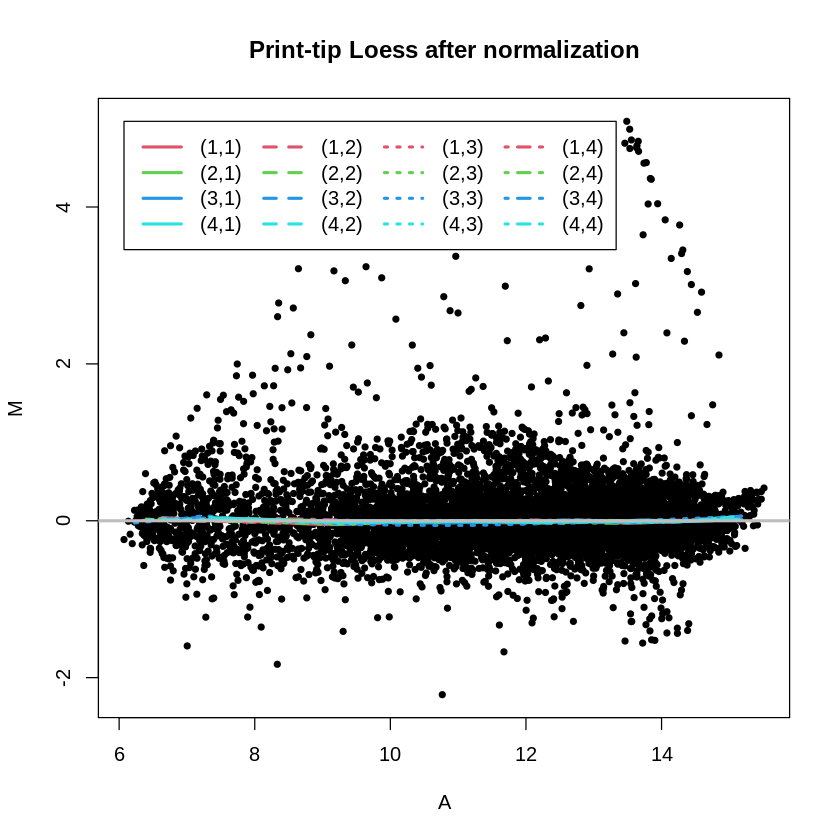

In [ ]:
mnorm = maNorm(swirl[, 1], norm="p", span=0.45)
maPlot(mnorm, main='Print-tip Loess after normalization')

Q2: Plot an MvA plot of array 3 WITHOUT any stratified lines.

##Pre-normalization MvA-plot for the swirl 3 array with the loess fit for print tip groups. 


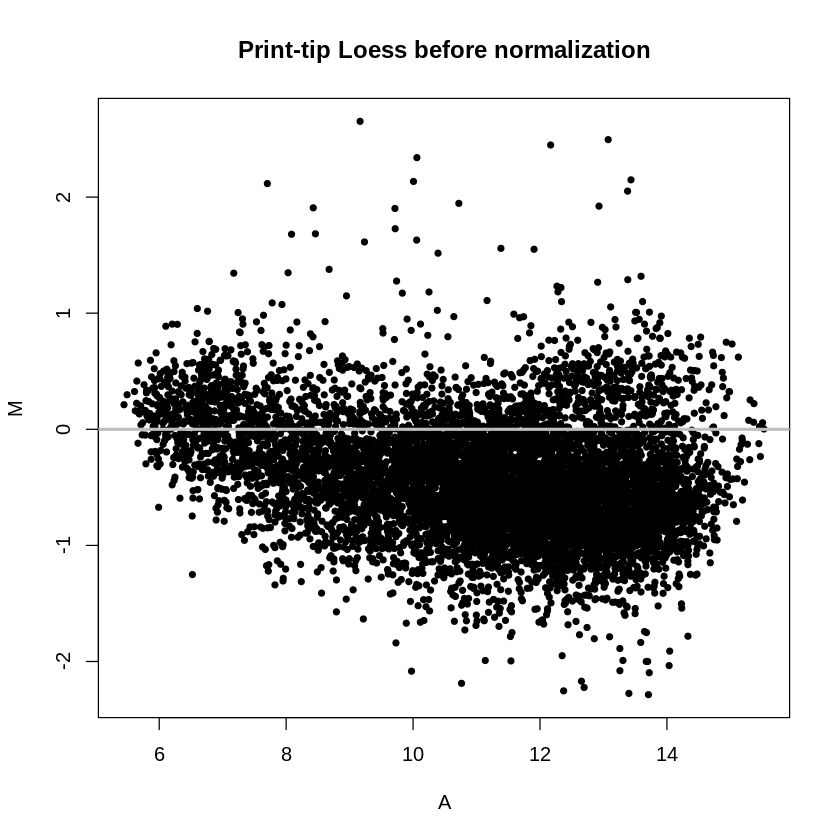

In [ ]:
maPlot(swirl[, 3], main='Print-tip Loess before normalization', lines.func = NULL, legend.func = NULL)

Q3: Normalize array 3 by global median location normalization.

##Post-normalization with print-tip loess

In [ ]:
mnorm = maNorm(swirl[, 3], norm='median', span=0.45)

Q4: Plot an MvA plot of the normalized array WITHOUT the stratified lines or legend.

##MvA plot normalized with median

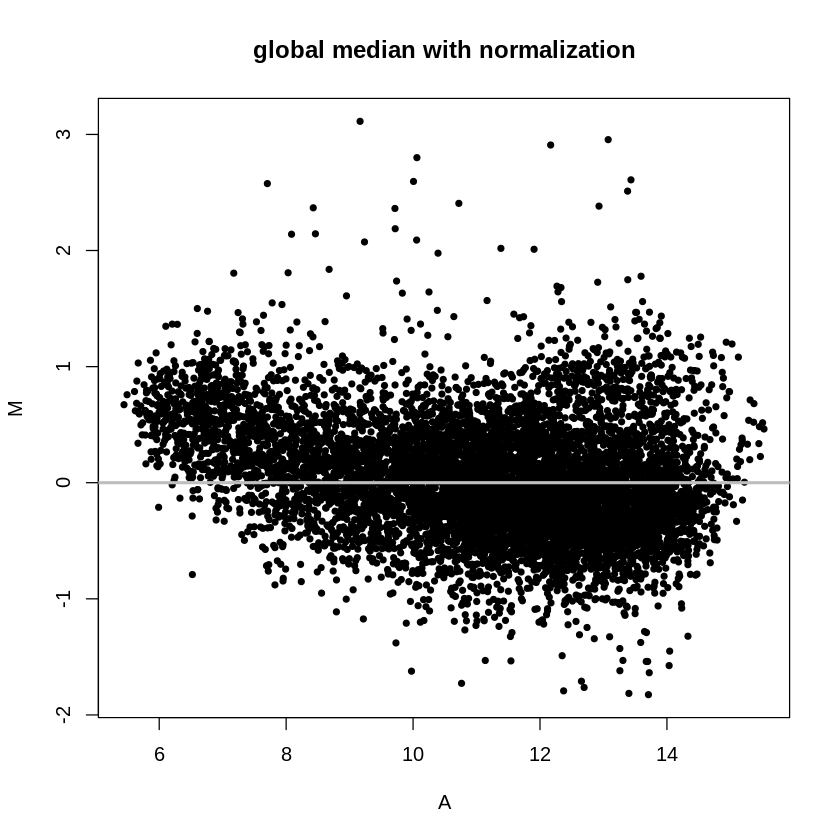

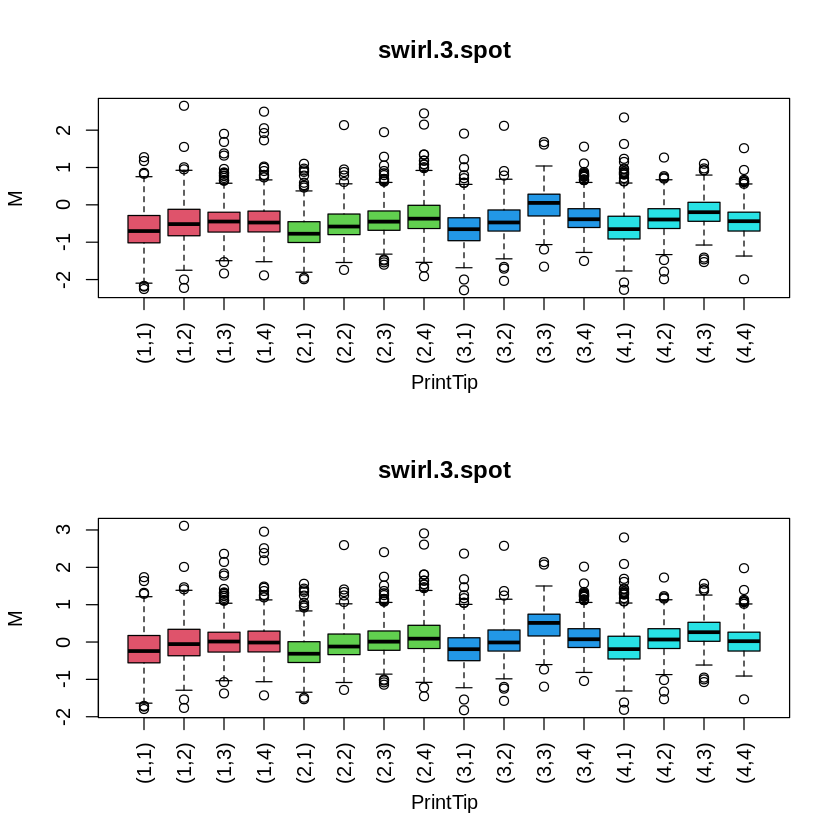

In [ ]:
maPlot(mnorm, main='global median with normalization', lines.func = NULL, legend.func = NULL)

par(mfrow = c(2, 1))
maBoxplot(swirl[, 3])
maBoxplot(mnorm)

Q5: What is different between the normalized data and the non-normalized data?

##The normalized data becomes centralized with a smaller variance.  


Q6: Repeat #3 and #4 applying loess global intensity normalization.

##Post-normalization with global loess intensity normalization

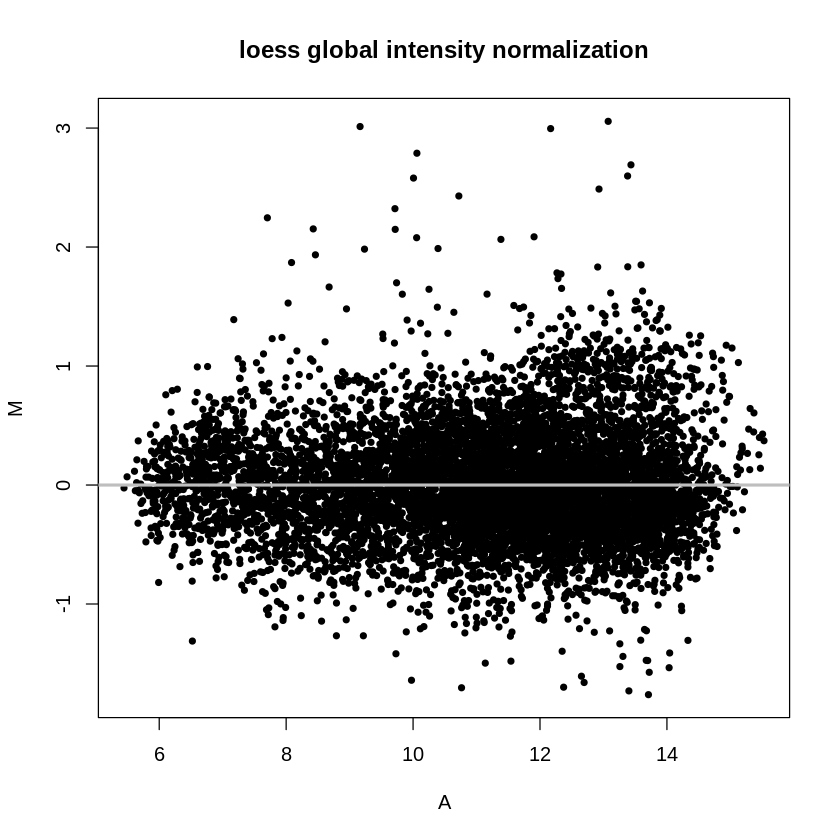

In [ ]:
lnorm = maNorm(swirl[, 3], norm = 'loess', span = 0.45)
maPlot(lnorm, main='loess global intensity normalization', lines.func = NULL, legend.func = NULL)

Q7: Which of the two normalizations appears to be better for this array? 

##Loess global intensity normalization  

Q8: Now we would like to read in raw GenePix files for 2 cDNA arrays that represent 2 patient samples.  Go to the course website and retrieve the compressed file called ‘GenePix files’.  Open it up and put the contents in a directory.  Now using the sample code below, read in the 2 array files.


##GenePix_file directory read and loaded. 

In [ ]:
dir_path = "GenePix_files/"
a_cdna = read.GenePix(path=dir_path, name.Gf = "F532 Median", 
                      name.Gb ="B532 Median", name.Rf = "F635 Median", 
                      name.Rb = "B635 Median", name.W ="Flags")
maGnames(a_cdna)@maLabels

Reading ...  GenePix_files//patient1.gpr 
Reading ...  GenePix_files//patient2.gpr 


[1] "36894"       "N/A"         "5548382"     "N/A"         "29305"      
    [6] "28821"       "28397"       "Unresolved"  "N/A"         "28361"      
   [11] "37974"       "5737347"     "24701"       "24605"       "24064"      
   [16] "24127"       "24149"       "24067"       "23676"       "23728"      
   [21] "2782153"     "N/A"         "N/A"         "5196954"     "No_seq"     
   [26] "40965"       "5933194"     "41427"       "35267"       "5265057"    
   [31] "35932"       "36716"       "36378"       "36577"       "41582"      
   [36] "N/A"         "34049"       "3083757"     "N/A"         "3852818"    
   [41] "51324"       "51321"       "51276"       "50915"       "48053"      
   [46] "48172"       "47539"       "47726"       "47183"       "47395"      
   [51] "47404"       "47243"       "4521436"     "5556148"     "N/A"        
   [56] "43208"       "N/A"         "43543"       "3900707"     "N/A"        
   [61] "Unresolved"  "No_seq"      "N/A"         "N/A"         "5763028"    
   [66] "5539144"     "5674838"     "116690"      "110447"      "110397"     
   [71] "110268"      "110385"      "110209"      "109941"      "109836"     
   [76] "109905"      "5787700"     "5923231"     "51358"       "234125"     
   [81] "127654"      "127698"      "Unresolved"  "127657"      "124175"     
   [86] "124126"      "123926"      "124209"      "123964"      "123913"     
   [91] "123543"      "123661"      "120780"      "120559"      "Unresolved" 
   [96] "5268373"     "120172"      "Unresolved"  "N/A"         "4385184"    
  [101] "Unresolved"  "137523"      "No_seq"      "N/A"         "137532"     
  [106] "N/A"         "137343"      "137292"      "133064"      "N/A"        
  [111] "132373"      "132631"      "132233"      "132314"      "131605"     
  [116] "131599"      "N/A"         "No_seq"      "N/A"         "128026"     
  [121] "155445"      "154215"      "153742"      "153760"      "Unresolved" 
  [126] "5442446"     "149286"      "149448"      "148951"      "No_seq"     
  [131] "148639"      "148683"      "143520"      "N/A"         "143452"     
  [136] "143401"      "142952"      "142780"      "142577"      "142573"     
  [141] "178750"      "178599"      "178779"      "No_seq"      "177787"     
  [146] "177758"      "176991"      "172025"      "165919"      "166010"     
  [151] "181124"      "No_seq"      "162976"      "Unresolved"  "162366"     
  [156] "No_seq"      "154811"      "3356239"     "No_seq"      "154478"     
  [161] "203179"      "203050"      "202816"      "202644"      "197670"     
  [166] "197713"      "210554"      "4803370"     "Unresolved"  "196727"     
  [171] "No_seq"      "4749237"     "726084"      "190697"      "190067"     
  [176] "No_seq"      "188289"      "188404"      "187776"      "187578"     
  [181] "222113"      "222038"      "221653"      "221347"      "220793"     
  [186] "220317"      "220492"      "220392"      "No_seq"      "211040"     
  [191] "N/A"         "No_seq"      "209870"      "209255"      "209241"     
  [196] "209281"      "204242"      "204114"      "212734"      "203436"     
  [201] "251269"      "4814905"     "No_seq"      "249973"      "244390"     
  [206] "244312"      "No_seq"      "243751"      "243541"      "243344"     
  [211] "5851583"     "Unresolved"  "234145"      "233802"      "5806046"    
  [216] "No_seq"      "N/A"         "233182"      "233144"      "233116"     
  [221] "N/A"         "271009"      "270896"      "270890"      "No_seq"     
  [226] "270537"      "No_seq"      "270210"      "265003"      "No_seq"     
  [231] "264521"      "264754"      "N/A"         "264250"      "5699029"    
  [236] "N/A"         "N/A"         "256177"      "252385"      "5788140"    
  [241] "Unresolved"  "292355"      "No_seq"      "291994"      "283413"     
  [246] "Unresolved"  "N/A"         "Unknown"     "282261"      "282232"     
  [251] "281756"      "281849"      "277859"      "277879"      "2271712"    
  [256] "4072128"     "277

Q9: Using the a.cdna object, which is analogous to the swirl metadata object, normalize both arrays and provide MvA plots for each array normalized by the following 3 methods: no normalization, print-tip loess normalization, and scale print-tip normalization using the MAD.  Hint: use the par(mfrow=c(3,1)) function to put the 3 plots for a single patient array on the same page.

[1] FALSE


NULL

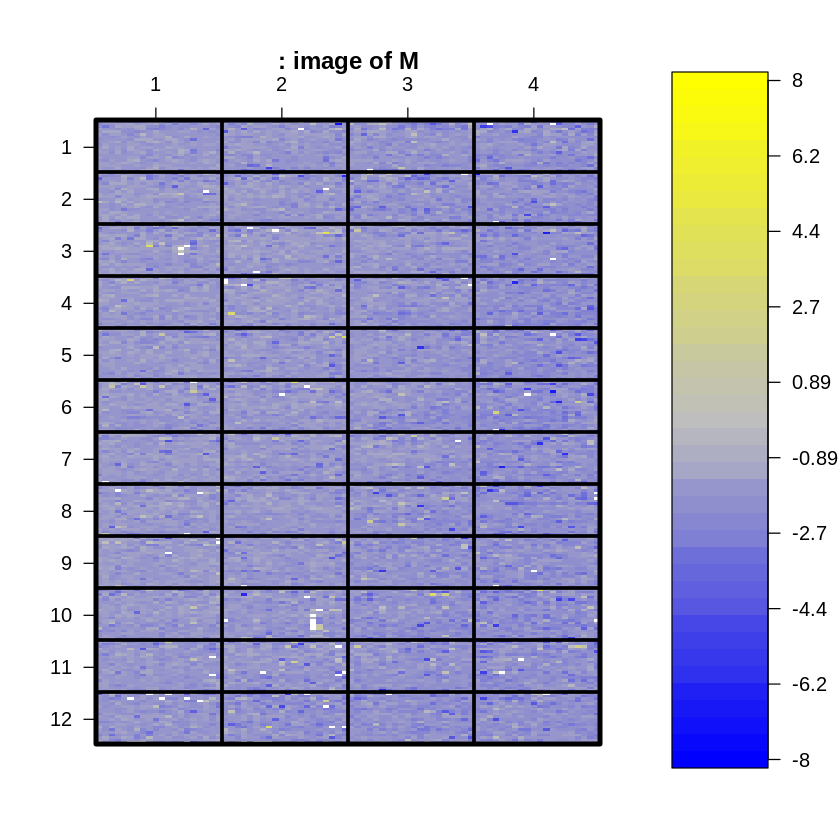

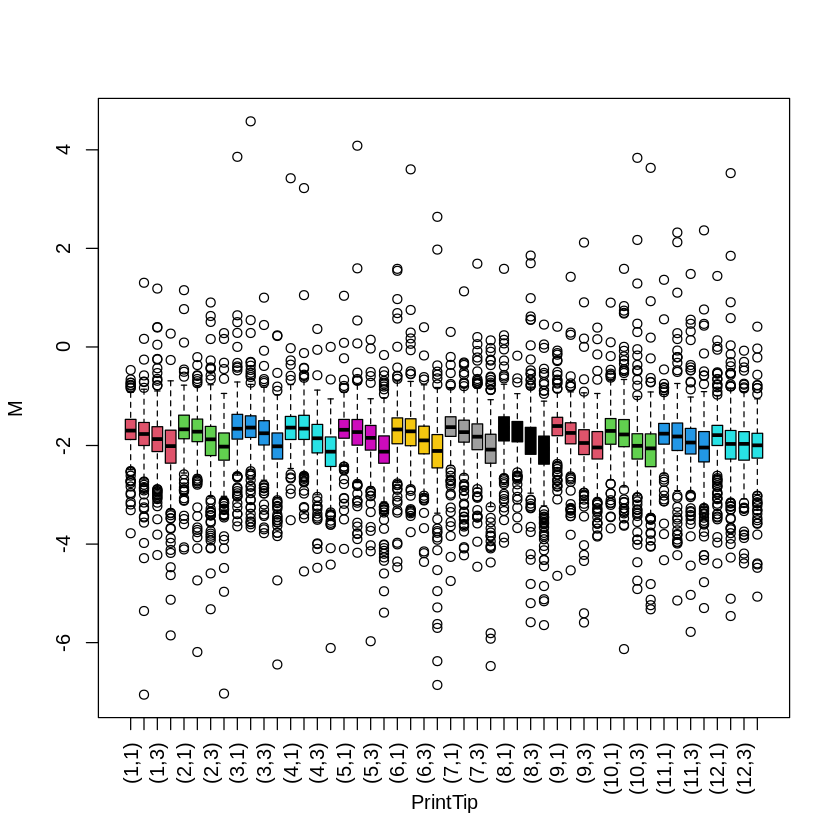

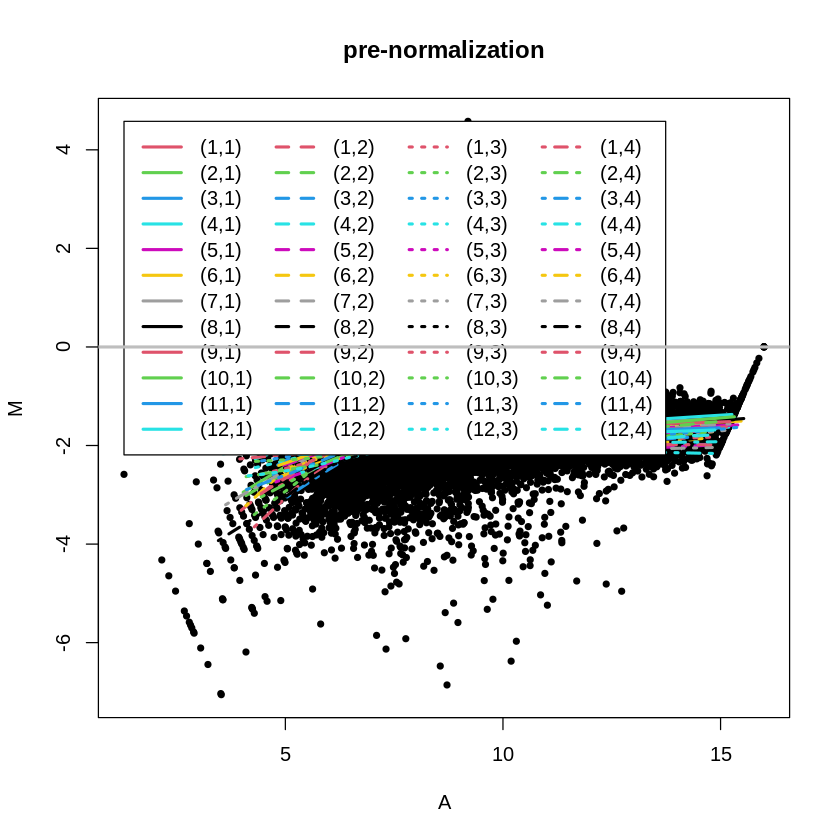

In [ ]:
maImage(a_cdna)

# a.cdna data - print-tip
maBoxplot(a_cdna[, 1]) 

# MvA-plot for a_cdna
maPlot(a_cdna[, 1], main='pre-normalization')

[1] FALSE


NULL

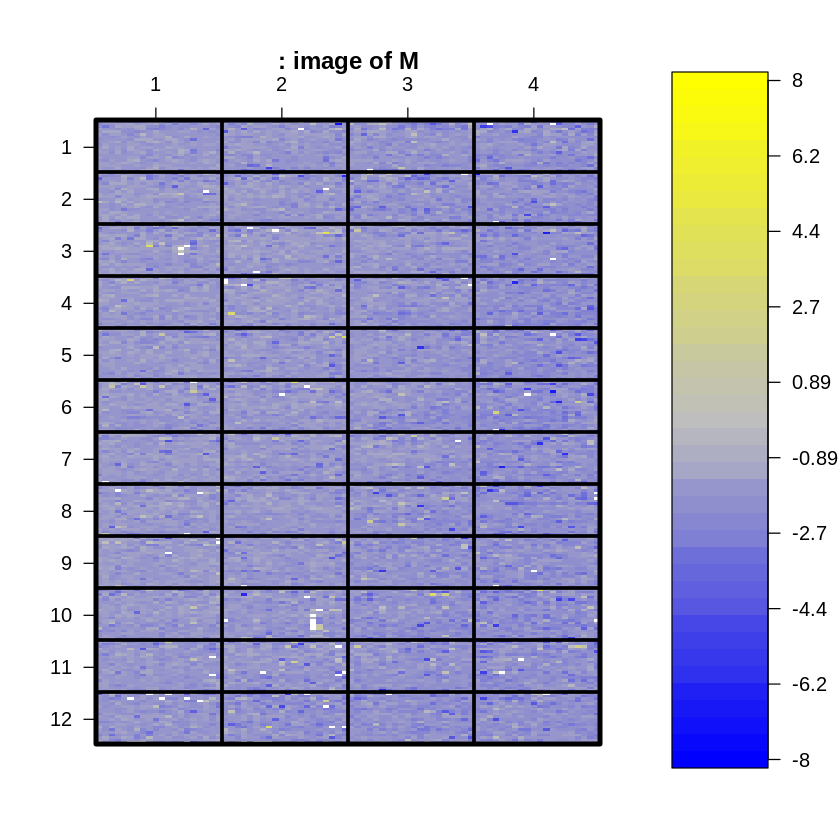

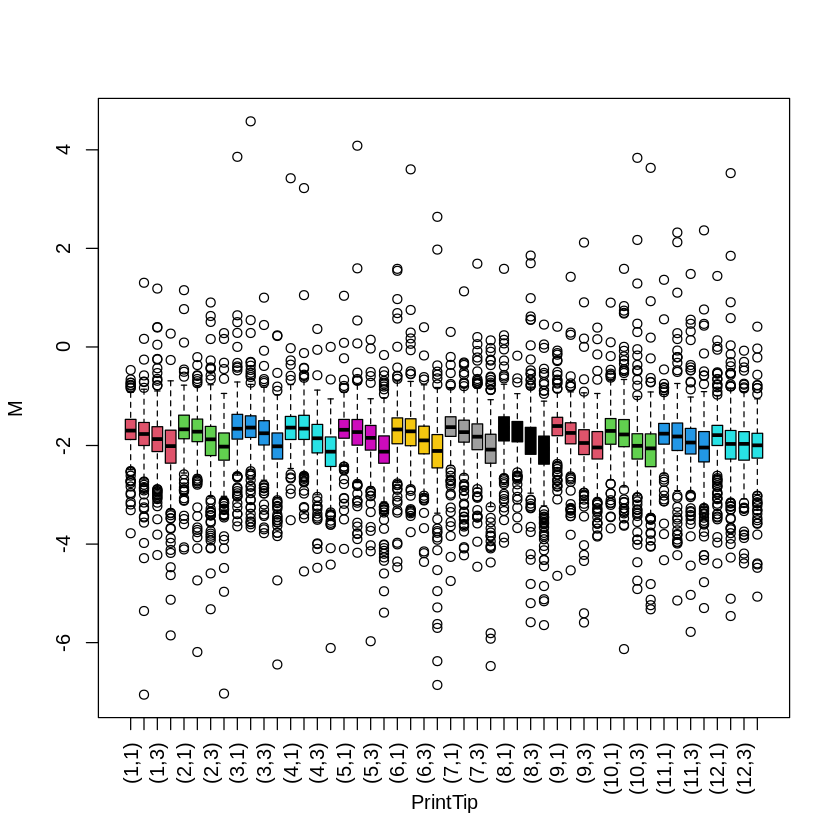

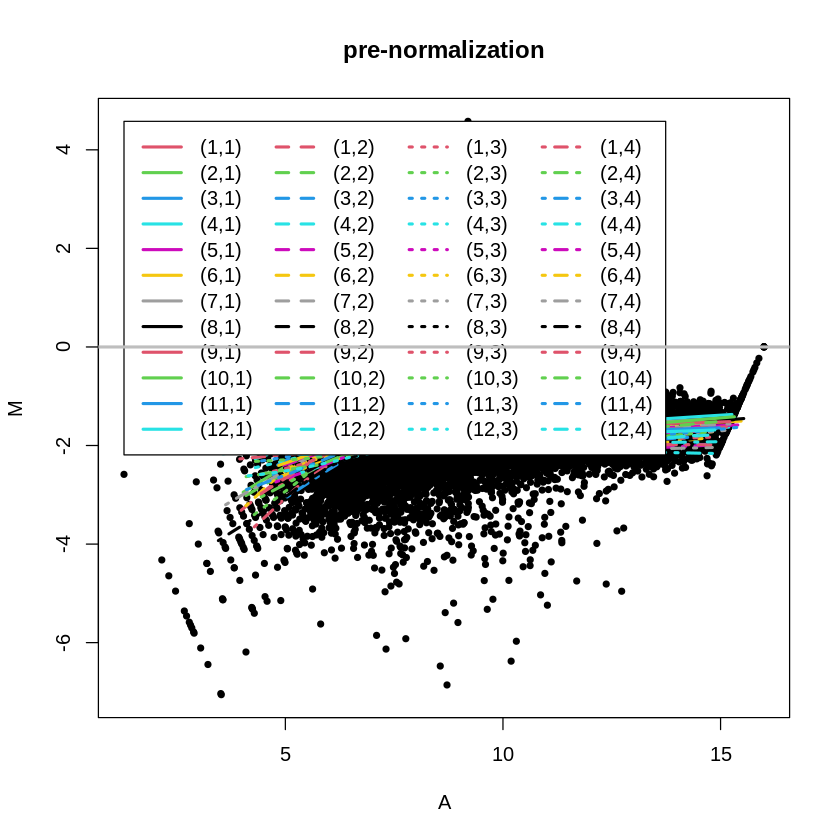

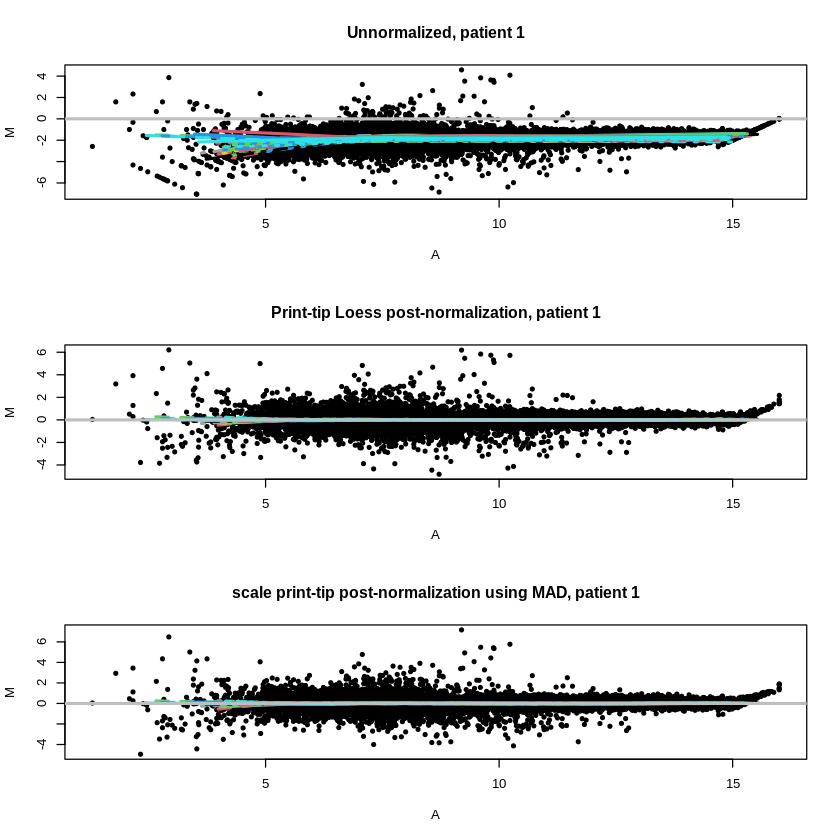

In [ ]:
# post-normalization - 3 methods 
un_norm_p1 = maNorm(a_cdna[, 1], norm='none', span=0.45)
p_norm_p1 = maNorm(a_cdna[, 1], norm = 'p', span=0.45)   # Print-tip Loess
s_norm_p1 = maNorm(a_cdna[, 1], norm = 's', span=0.45)   # scale print-tip using Median Absolute Deviation (MAD)

# plot with 3 normalization methods 
par(mfrow=c(3, 1))
maPlot(un_norm_p1, main='Unnormalized for patient 1', legend.func = NULL)
maPlot(p_norm_p1, main='Print-tip Loess post-norm for patient 1', legend.func = NULL)
maPlot(s_norm_p1, main='Scaled print-tip post-norm with MAD for patient 1', legend.func = NULL)

##Normalization of patient 2 arrays

##boxplot of a.cdna data - print-tip

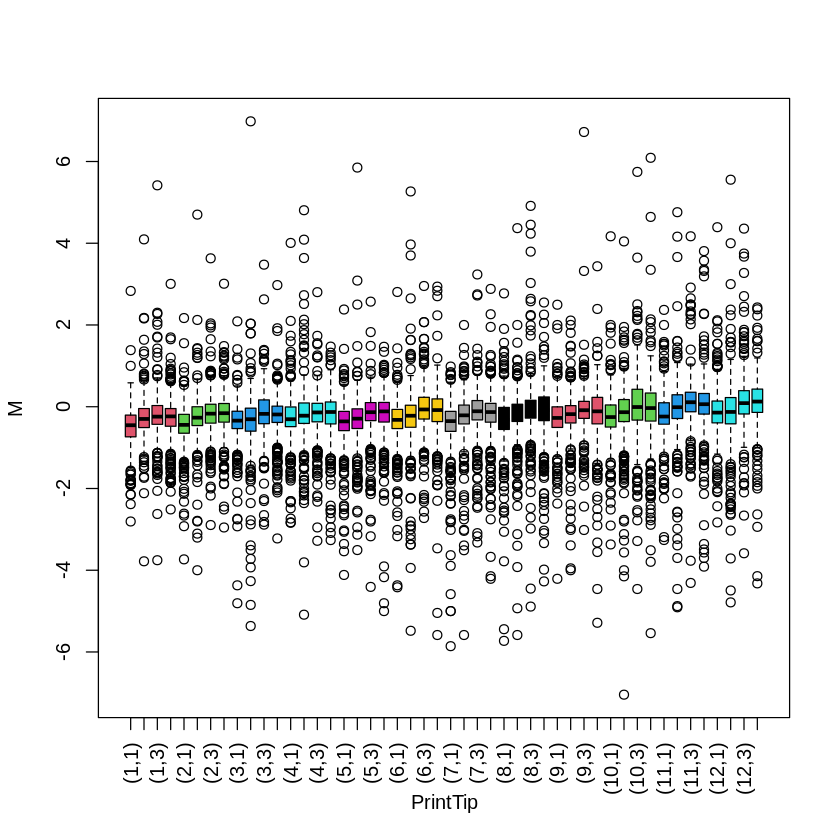

In [ ]:
maBoxplot(a_cdna[, 2]) 

##post-normalization with three methods 

In [ ]:
no_norm_p2 = maNorm(a_cdna[, 2], norm='none', span=0.45)

##print-tip loess

In [ ]:
p_norm_p2 = maNorm(a_cdna[, 2], norm = 'p', span=0.45)

##scale print-tip using median absolute deviation or MAD

In [ ]:
s_norm_p2 = maNorm(a_cdna[, 2], norm = 's', span=0.45)

##plots for 3 normalization methods 


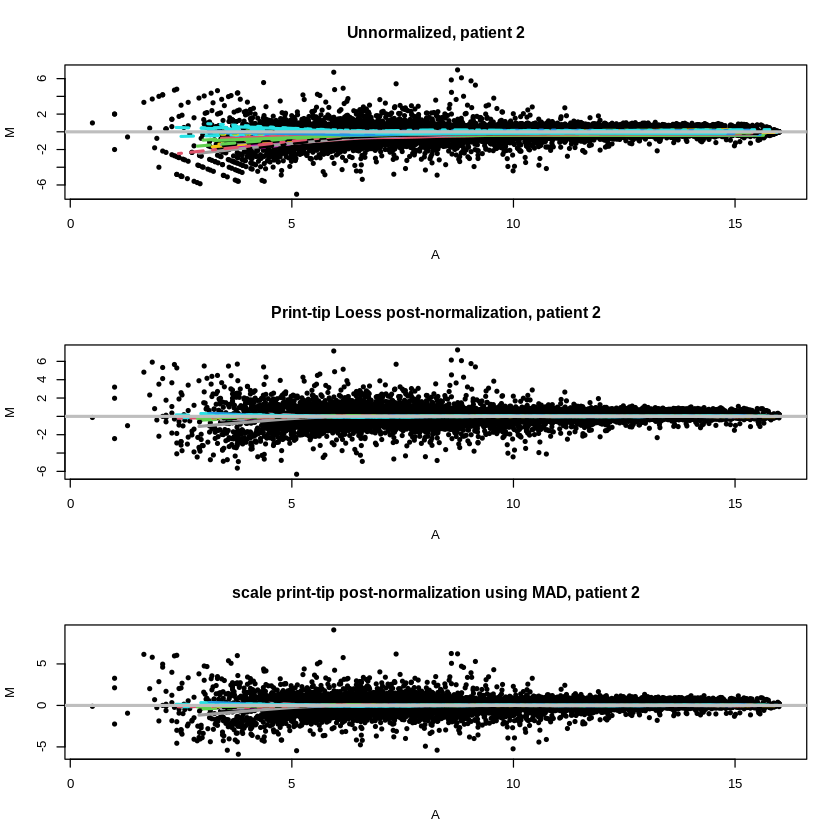

In [ ]:
par(mfrow=c(3, 1))
maPlot(no_norm_p2, main='Unnormalized, patient 2', legend.func = NULL)
maPlot(p_norm_p2, main='Print-tip Loess post-normalization, patient 2', legend.func = NULL)
maPlot(s_norm_p2, main='scale print-tip post-normalization using MAD, patient 2', legend.func = NULL)

Q10: Finally, we would like to create a data matrix that can be written out to a file with 19,200 rows and 2 columns (i.e. each patient array).  Using the functions maM(), maGnames(), and maLabels(), figure out how to create the data matrix, get the probe IDs, and assign the probe IDs to the row names.  Do this for the 2 normalized metadata objects that you created in #9 above (don’t worry about the un-normalized data matrix).


##Data Frames with labels/ Probe IDs serving as index

In [ ]:
p_norm_df = data.frame(a_cdna@maGnames@maLabels, p_norm_p1@maM, p_norm_p2@maM)
s_norm_df = data.frame(a_cdna@maGnames@maLabels, s_norm_p1@maM, s_norm_p2@maM)

##Checking dimensions

In [ ]:
dim(p_norm_df)
dim(s_norm_df)

[1] 19200     3

[1] 19200     3

In [ ]:
library(dplyr)

In [ ]:
p_norm_df = p_norm_df %>% group_by(a_cdna.maGnames.maLabels) %>% summarize(mean(GenePix_files..patient1.gpr), mean(GenePix_files..patient2.gpr))#, na.rm = FALSE
head(p_norm_df)

a_cdna.maGnames.maLabels,mean(GenePix_files..patient1.gpr),mean(GenePix_files..patient2.gpr)
<chr>,<dbl>,<dbl>
1018338,-0.300577661,-0.1436342
1020408,1.259608926,1.8311521
1047069,-0.004400175,0.0246008
1048420,0.678484387,0.2099745
1075122,-0.303342679,-0.0584261
108179,0.278837022,-0.3720192


In [ ]:
s_norm_df = s_norm_df %>% group_by(a_cdna.maGnames.maLabels) %>% summarize(mean(GenePix_files..patient1.gpr), mean(GenePix_files..patient2.gpr))#, na.rm = FALSE
head(s_norm_df)

a_cdna.maGnames.maLabels,mean(GenePix_files..patient1.gpr),mean(GenePix_files..patient2.gpr)
<chr>,<dbl>,<dbl>
1018338,-0.265224803,-0.11730402
1020408,1.362947091,1.81361508
1047069,-0.004433575,0.02505674
1048420,0.612144736,0.17691827
1075122,-0.301354528,-0.05621340
108179,0.322919044,-0.31892075


In [ ]:
p_norm_df = p_norm_df %>% column_to_rownames('a_cdna.maGnames.maLabels')
s_norm_df = s_norm_df %>% column_to_rownames('a_cdna.maGnames.maLabels')

In [ ]:
head(p_norm_df)

,mean(GenePix_files..patient1.gpr),mean(GenePix_files..patient2.gpr)
,<dbl>,<dbl>
1018338,-0.300577661,-0.1436342
1020408,1.259608926,1.8311521
1047069,-0.004400175,0.0246008
1048420,0.678484387,0.2099745
1075122,-0.303342679,-0.0584261
108179,0.278837022,-0.3720192


In [ ]:
head(s_norm_df)

,mean(GenePix_files..patient1.gpr),mean(GenePix_files..patient2.gpr)
,<dbl>,<dbl>
1018338,-0.265224803,-0.11730402
1020408,1.362947091,1.81361508
1047069,-0.004433575,0.02505674
1048420,0.612144736,0.17691827
1075122,-0.301354528,-0.05621340
108179,0.322919044,-0.31892075


Q11: Load the following libraries: affy, limma, affydata, affyPLM, and fpc.

In [ ]:
BiocManager::install('affy')
BiocManager::install('affydata')
BiocManager::install('affy')
BiocManager::install('affyPLM')

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.1 (2022-06-23)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'affy'”
Old packages: 'brew', 'crayon', 'devtools', 'roxygen2', 'tibble', 'tidyverse',
  'tinytex', 'vctrs', 'foreign', 'nnet'

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.1 (2022-06-23)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'affydata'”
Old packages: 'brew', 'crayon', 'devtools', 'roxygen2', 'tibble', 'tidyverse',
  'tinytex', 'vctrs', 'foreign', 'nnet'

'getOption("repos")' replaces Bioconductor standar

In [ ]:
BiocManager::install('limma')
BiocManager::install('fpc')

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.1 (2022-06-23)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'limma'”
Old packages: 'brew', 'crayon', 'devtools', 'roxygen2', 'tibble', 'tidyverse',
  'tinytex', 'vctrs', 'foreign', 'nnet'

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.1 (2022-06-23)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'fpc'”
Old packages: 'brew', 'crayon', 'devtools', 'roxygen2', 'tibble', 'tidyverse',
  'tinytex', 'vctrs', 'foreign', 'nnet'



In [ ]:
library(limma)
library(fpc)

In [ ]:
library(affy)
library(affydata)
library(affyPLM)

Q12: Now we would like to read in 3 raw Affymetrix .CEL files and normalize them with 2 different algorithms.  These 3 arrays represent 3 normal healthy subjects that should have similar expression profiles.  They are on the course website in the compressed file called Affymetrix .CEL files.  Use the following code below to read in a metadata object for the 3 arrays (dir.path should be the same as above).



##Files read and loaded.

In [ ]:
# fns = sort(list.celfiles(path='Normal_Files', full.names=TRUE)) #-- CORRECT ONE
fns = sort(list.celfiles(path=dir_path, full.names=TRUE))
data_affy = ReadAffy(filenames=fns, phenoData=NULL)

In [ ]:
head(data_affy@assayData$exprs)

,normal1.CEL,normal2.CEL,normal3.CEL
1,343,156,79
2,11404,14470,15389
3,337,191,174
4,12665,14626,16609
5,284,290,96
6,149,145,80


In [ ]:
dim(data_affy@assayData$exprs)

[1] 1354896       3

In [ ]:
head(exprs(data_affy))

,normal1.CEL,normal2.CEL,normal3.CEL
1,343,156,79
2,11404,14470,15389
3,337,191,174
4,12665,14626,16609
5,284,290,96
6,149,145,80


In [ ]:
BiocManager::install('hgu133plus2cdf')

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.1 (2022-06-23)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'hgu133plus2cdf'”
Old packages: 'brew', 'crayon', 'devtools', 'roxygen2', 'tibble', 'tidyverse',
  'tinytex', 'vctrs', 'foreign', 'nnet'



13.) Using the function: expresso in addition to exprs(), create the normalized data matrices with 54,675 rows and 3 columns for the 2 different normalization algorithms.
Be sure to use 
normalize.method="quantiles", 
summary.method="medianpolish", 
and for RMA: 
pmcorrect.method="pmonly"
MAS: 
pmcorrect.method="mas”


##Normal data frames generated with normalization methods using espresso and exprs and the following method paramaters: normalize.method="quantiles", summary.method="medianpolish", and for RMA: pmcorrect.method="pmonly" MAS: pmcorrect.method="mas”

##RMA data frame created

In [ ]:
eset_rma = expresso(data_affy, bgcorrect.method="rma",
                    normalize.method="quantiles",
                    pmcorrect.method="pmonly",
                    summary.method="medianpolish")

background correction: rma 
normalization: quantiles 
PM/MM correction : pmonly 
expression values: medianpolish 
background correcting...done.
normalizing...done.
54675 ids to be processed
|                    |
|####################|


In [ ]:
head(eset_rma@assayData$exprs)

,normal1.CEL,normal2.CEL,normal3.CEL
1007_s_at,6.732547,6.772589,6.950047
1053_at,6.986680,6.986680,6.986680
117_at,7.334083,9.792765,9.794139
121_at,7.179351,7.439034,7.677756
1255_g_at,3.423446,3.423446,3.423446
1294_at,8.402456,8.402456,8.402456


MAS data frame created

In [ ]:
eset_mas = expresso(data_affy, bgcorrect.method="rma",
                normalize.method="quantiles",
                pmcorrect.method="mas",
                summary.method="medianpolish")

background correction: rma 
normalization: quantiles 
PM/MM correction : mas 
expression values: medianpolish 
background correcting...done.
normalizing...done.
54675 ids to be processed
|                    |
|####################|


In [ ]:
head(eset_mas@assayData$exprs)

,normal1.CEL,normal2.CEL,normal3.CEL
1007_s_at,1.286692,1.286692,1.349697
1053_at,1.895235,1.895235,1.895235
117_at,1.540961,8.960410,9.125406
121_at,2.009759,2.136430,3.181483
1255_g_at,-2.498134,-2.543694,-2.543694
1294_at,7.146705,7.146705,7.146705


14.) Now use the cor() function to calculate the correlation between the 3 arrays for both normalized data matrices.  Since these 3 subjects are all healthy normal individuals, we would expect to see somewhat good correlation structure between them all when looking across all genes on the array.  Which normalization method has a higher overall correlation structure for these 3 normal healthy subjects?  Show how you arrived at this answer.

##cor_rma has a higher overall correlation value. the difference between ##correlation matrices is positive for cor_rma

In [ ]:
cor_rma = cor(eset_rma@assayData$exprs)
cor_rma

,normal1.CEL,normal2.CEL,normal3.CEL
normal1.CEL,1.0000000,0.9766785,0.9758377
normal2.CEL,0.9766785,1.0000000,0.9913585
normal3.CEL,0.9758377,0.9913585,1.0000000


In [ ]:
cor_mas = cor(eset_mas@assayData$exprs)
cor_mas

,normal1.CEL,normal2.CEL,normal3.CEL
normal1.CEL,1.0000000,0.9563402,0.9561264
normal2.CEL,0.9563402,1.0000000,0.9871987
normal3.CEL,0.9561264,0.9871987,1.0000000


In [ ]:
cor_rma - cor_mas

,normal1.CEL,normal2.CEL,normal3.CEL
normal1.CEL,0.00000000,0.020338321,0.019711342
normal2.CEL,0.02033832,0.000000000,0.004159798
normal3.CEL,0.01971134,0.004159798,0.000000000
